In [2]:
import pandas as pd 
df = pd.read_csv("Telco-Customer-Churn.csv")


In [3]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [5]:
print(df.duplicated().sum())

0


In [6]:
print(df['Churn'].value_counts(normalize=True))

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [7]:
df[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [8]:
pd.crosstab(df['Churn'], df['Contract'], normalize='index')

Contract,Month-to-month,One year,Two year
Churn,,,
No,0.429068,0.252609,0.318322
Yes,0.885500,0.088818,0.025682


In [9]:
pd.crosstab(df['Churn'], df['PaymentMethod'], normalize='index')

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Churn,,,,
No,0.248550,0.249324,0.250097,0.252029
Yes,0.138042,0.124131,0.573034,0.164794


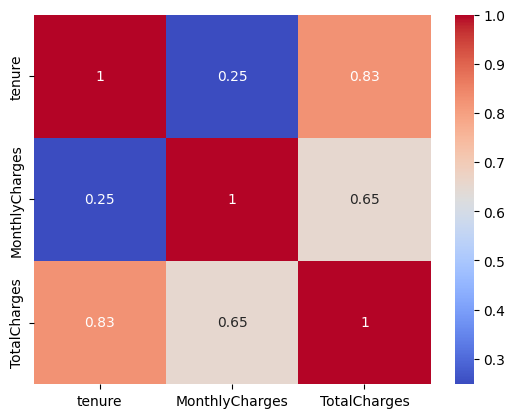

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x: 'Yes' if x == 1 else 'No')
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()


In [11]:
df.groupby('Churn')['tenure'].mean()

Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64

In [12]:
df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x: 1 if x == 'Yes' else 0)

In [13]:
pd.crosstab(df['Churn'], df['OnlineSecurity'], normalize='index')

OnlineSecurity,No,No internet service,Yes
Churn,,,
No,0.393699,0.273096,0.333204
Yes,0.781701,0.060460,0.157838


In [14]:
#first new feature
def tenure_group(tenure):
    if tenure <= 12:
        return "0-1 Year"
    elif tenure <= 24:
        return "1-2 Years"
    elif tenure <= 48:
        return "2-4 Years"
    elif tenure <= 60:
        return "4-5 Years"
    else:
        return "5+ Years"
df['TenureGroup'] = df['tenure'].apply(tenure_group)

#second new feature
services=['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
df['TotalServices']=df[services].apply(lambda row: sum(row=='Yes'),axis=1)

#third new feature
df['TenureNorm'] = df['tenure'] / df['tenure'].max()



In [15]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... StreamingMovies  \
0  No phone service             DSL             No  ...              No   
1                No             DSL            Yes  ...              No   
2                No             DSL            Yes  ...              No   
3  No phone service             DSL            Yes  ...              No   
4                No     Fiber optic             No  ...              No   

         Contract PaperlessBilling              PaymentMethod Monthl

In [16]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
for col in ['gender','Partner','Dependents','PhoneService','PaperlessBilling','Churn','TenureGroup']:
    df[col] = LabelEncoder().fit_transform(df[col])

# One-Hot Encoding
df = pd.get_dummies(df, columns=['Contract','InternetService','PaymentMethod',
                                 'MultipleLines','OnlineSecurity','OnlineBackup',
                                 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies'], 
                    drop_first=True)
df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)
df['TenureGroup'] = df['TenureGroup'].astype('category').cat.codes

In [17]:
df= df.drop(['customerID'],axis=1)

In [18]:
print(df.dtypes)

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
TenureGroup                                 int8
TotalServices                              int64
TenureNorm                               float64
Contract_One year                           bool
Contract_Two year                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
PaymentMethod_Credit card (automatic)       bool
PaymentMethod_Electronic check              bool
PaymentMethod_Mailed check                  bool
MultipleLines_No pho

In [19]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df.drop('Churn', axis=1)
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:\n", y_train.value_counts())
print("After SMOTE:\n", y_train_res.value_counts())


Before SMOTE:
 Churn
0    4139
1    1495
Name: count, dtype: int64
After SMOTE:
 Churn
0    4139
1    4139
Name: count, dtype: int64


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC

log_reg = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
rf = RandomForestClassifier(class_weight="balanced", n_estimators=200, random_state=42)
svm = SVC(class_weight="balanced", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[("lr", log_reg), ("rf", rf), ("svm", svm)],
    voting="soft"
)

for clf, label in zip([log_reg, rf, svm, voting_clf], 
                      ["LogReg", "RandomForest", "SVM", "Voting"]):
    clf.fit(X_train_res, y_train_res)
    y_pred = clf.predict(X_test)
    print(f"{label} Accuracy: {clf.score(X_test, y_test):.4f}")


C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogReg Accuracy: 0.7828
RandomForest Accuracy: 0.7764
SVM Accuracy: 0.6920


C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Accuracy: 0.7857


In [21]:
from sklearn.metrics import classification_report, roc_auc_score

for clf, label in zip([log_reg, rf, svm, voting_clf], 
                      ["LogReg", "RandomForest", "SVM", "Voting"]):
    clf.fit(X_train_res, y_train_res)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:,1] if hasattr(clf, "predict_proba") else None
    
    print(f"\nModel: {label}")
    print(classification_report(y_test, y_pred))
    if y_proba is not None:
        print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")


C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Model: LogReg
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1035
           1       0.59      0.62      0.60       374

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.73      1409
weighted avg       0.79      0.78      0.78      1409

ROC-AUC: 0.8287

Model: RandomForest
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1035
           1       0.58      0.60      0.59       374

    accuracy                           0.78      1409
   macro avg       0.71      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409

ROC-AUC: 0.8195

Model: SVM
              precision    recall  f1-score   support

           0       0.84      0.71      0.77      1035
           1       0.44      0.63      0.52       374

    accuracy                           0.69      1409
   macro avg       0.64      0.67      0.65     

C:\Users\dell\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Model: Voting
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1035
           1       0.59      0.64      0.61       374

    accuracy                           0.79      1409
   macro avg       0.73      0.74      0.73      1409
weighted avg       0.79      0.79      0.79      1409

ROC-AUC: 0.8326


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
# ---- Logistic Regression Feature Importance ---- 
log_reg_importance = pd.DataFrame({
    'Feature': X_train_res.columns,
    'Importance': np.abs(log_reg.coef_[0])
}).sort_values(by='Importance', ascending=False)

print("Top Features (Logistic Regression):")
print(log_reg_importance.head(10))


# ---- Random Forest Feature Importance ---- 
rf_importance = pd.DataFrame({
    'Feature': X_train_res.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop Features (Random Forest):")
print(rf_importance.head(10))



Top Features (Logistic Regression):
                           Feature  Importance
10                   TotalServices    3.696470
20               MultipleLines_Yes    3.614202
26            DeviceProtection_Yes    3.315582
30                 StreamingTV_Yes    3.282258
32             StreamingMovies_Yes    3.273520
24                OnlineBackup_Yes    3.181484
28                 TechSupport_Yes    2.973521
22              OnlineSecurity_Yes    2.917268
17  PaymentMethod_Electronic check    1.255064
18      PaymentMethod_Mailed check    1.077682

Top Features (Random Forest):
                           Feature  Importance
8                     TotalCharges    0.118636
7                   MonthlyCharges    0.114115
11                      TenureNorm    0.096475
17  PaymentMethod_Electronic check    0.091371
4                           tenure    0.090480
14     InternetService_Fiber optic    0.056202
9                      TenureGroup    0.047080
10                   TotalServices    0.

In [26]:

import joblib
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


feature_columns = X_train_res.columns.tolist()    

# choosing numeric columns that need scaling
categorical = ["gender", "Partner", "Dependents"]
numeric = ["tenure", "MonthlyCharges", "TotalCharges"]


preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical),
        ("num", StandardScaler(), numeric)
    ]
)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", rf)   
])

pipeline.fit(X_train_res, y_train_res)
# Save the pipeline and feature order
joblib.dump(pipeline, "churn_pipeline.pkl")

joblib.dump(feature_columns, "feature_columns.pkl")
print("Saved pipeline -> churn_pipeline.pkl and feature_columns.pkl")


Saved pipeline -> churn_pipeline.pkl and feature_columns.pkl


In [24]:
# app/main.py
from fastapi import FastAPI, HTTPException
from pydantic import BaseModel
import joblib
import pandas as pd
import numpy as np
import os


PIPELINE_PATH = os.environ.get("PIPELINE_PATH", "churn_pipeline.pkl")
FEATURES_PATH = os.environ.get("FEATURES_PATH", "feature_columns.pkl")

pipeline = joblib.load(PIPELINE_PATH)
feature_columns = joblib.load(FEATURES_PATH)  

app = FastAPI(title="Churn Prediction API")

class Customer(BaseModel):
    # define the expected fields (example; adapt to your features)
    customerID: str | None = None
    gender: str | None = None
    SeniorCitizen: int | None = None
    Partner: int | None = None
    Dependents: int | None = None
    tenure: float
    MonthlyCharges: float
    TotalCharges: float
    TotalServices: int
    TenureNorm: float
    # plus the one-hot columns you used; alternatively accept a free dict below
    # To keep it flexible, we accept additional fields via extra model later

class RawCustomer(BaseModel):
    data: dict  # expects a dict mapping feature names -> values

@app.get("/")
def root():
    return {"status": "ok", "message": "Churn Prediction API"}

@app.post("/predict")
def predict(payload: RawCustomer):
    try:
        row = payload.data
        # Build dataframe in the same column order as training
        # Start with empty DF with feature_columns
        X = pd.DataFrame([row], columns=feature_columns)
        # Fill missing columns with 0 (for dummy columns) or NaN for numeric
        for c in feature_columns:
            if c not in X.columns:
                # default for dummies = 0, numeric = 0
                X[c] = 0
        # Reorder
        X = X[feature_columns]

        # Ensure numeric types where possible
        X = X.apply(pd.to_numeric, errors="ignore")

        # predict
        proba = pipeline.predict_proba(X)[:, 1][0]
        pred = int(pipeline.predict(X)[0])

        return {"prediction": pred, "probability": float(proba)}
    except Exception as e:
        raise HTTPException(status_code=400, detail=str(e))

@app.post("/predict_bulk")
def predict_bulk(payload: dict):
    # expects {"instances": [ {feature: val, ...}, {...} ]}
    try:
        instances = payload.get("instances", [])
        X = pd.DataFrame(instances)
        # ensure all columns present
        for c in feature_columns:
            if c not in X.columns:
                X[c] = 0
        X = X[feature_columns]
        X = X.apply(pd.to_numeric, errors="ignore")
        probas = pipeline.predict_proba(X)[:, 1].tolist()
        preds = pipeline.predict(X).astype(int).tolist()
        return {"predictions": preds, "probabilities": probas}
    except Exception as e:
        raise HTTPException(status_code=400, detail=str(e))
